## Project No 3: SVD-Based Digital Image Watermarking Scheme
#### Alper Tutum
#### 150210088
#### Istanbul Technical University
#### Computer Engineering

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for PRNG
import random
random.seed(1773)

In [2]:
# Read the image into numpy arrays
host = plt.imread('host_image.png')
watermark = plt.imread('watermark.png')

# Partition the host array into blocks of size 8x8
host_blocks = host.reshape(64, 8, 64, 8)

# The initial matrix is now a 64x64 matrix with every element being a 8x8 matrix
# An example 8 by 8 block at row 51, column 51 of the new matrix
sub_matrix = host_blocks[50,:,50,:]
print('The sub-matrix at index 50:50\n', sub_matrix)

The sub-matrix at index 50:50
 [[0.6901961  0.6431373  0.67058825 0.42745098 0.36078432 0.5411765
  0.8039216  0.7019608 ]
 [0.63529414 0.8039216  0.8        0.60784316 0.5137255  0.47058824
  0.5647059  0.81960785]
 [0.68235296 0.5019608  0.78431374 0.6509804  0.41568628 0.46666667
  0.56078434 0.61960787]
 [0.8156863  0.69803923 0.76862746 0.80784315 0.73333335 0.5372549
  0.46666667 0.40784314]
 [0.6745098  0.85882354 0.8509804  0.7411765  0.67058825 0.7372549
  0.5647059  0.47058824]
 [0.4        0.654902   0.84705883 0.83137256 0.5372549  0.5529412
  0.78431374 0.69803923]
 [0.43529412 0.40784314 0.70980394 0.8666667  0.84705883 0.6862745
  0.65882355 0.7921569 ]
 [0.30980393 0.38039216 0.58431375 0.7921569  0.7764706  0.8235294
  0.6901961  0.5764706 ]]


### Singular Value Decomposition and Sorting Blocks According to Their Complexity

#### SVD On a single block

##### Step 1:

In [3]:
# Let's use the 8 by 8 sub-matrix found above

# Firstly the multiplication of the matrix with its transpose is performed
# in order to obtain a symmetrical matrix
S = sub_matrix
ST = np.transpose(S)
STS = np.matmul(ST, S)

print(STS)

[[2.911342  3.0031374 3.5360248 3.2394774 2.7336872 2.701469  2.872157
  2.8806922]
 [3.0031374 3.2766476 3.8019838 3.4900424 2.9341795 2.9240909 3.1081276
  3.1097274]
 [3.5360248 3.8019838 4.5825453 4.317401  3.623299  3.5824223 3.805229
  3.8167167]
 [3.2394774 3.4900424 4.317401  4.2477202 3.6223917 3.5084505 3.6172705
  3.6033838]
 [2.7336872 2.9341795 3.623299  3.6223917 3.163399  3.0372014 3.0495195
  3.0401695]
 [2.701469  2.9240909 3.5824223 3.5084505 3.0372014 3.0192082 3.0837681
  3.0251443]
 [2.872157  3.1081276 3.805229  3.6172705 3.0495195 3.0837681 3.3418992
  3.297947 ]
 [2.8806922 3.1097274 3.8167167 3.6033838 3.0401695 3.0251443 3.297947
  3.3832986]]


##### Step 2: Eigenvalues and Eigenvectors

In [4]:
# Eigenvalues and eigenvectors of STS can be found with the QR iteration method
def qr_method(A):
    # This method converges fast so 100 iterations should be enough for our purposes
    for x in range(100):
        # Get a orthogonal matrix Q and an upper triangular matrix R
        # from the QR decomposition of the given matrix A
        Q, R = np.linalg.qr(A)

        # The eigenvectors will be obtained from the multiplication of all Qs in all iterations
        if x > 0:
            eigenvectors = np.matmul(eigenvectors, Q)
        else:
            # No multiplication in the first iteration
            eigenvectors = Q
        
        # Create the next A from the R and Q matrices of the last one
        A = np.matmul(R, Q)

    # The eigenvalues of A are located in the diagonal of A
    diagonal = np.diag(A)
    # eigenvalues are already sorted from biggest to smallest
    # which means the corresponding eigenvectors will have the correct order too

    # This method fails to assign 0 as an eigenvalue because it can't fully converge
    # By checking if the value is smaller than a particular amount we can say it's 0
    eigenvalues = np.where(diagonal < 10**(-10), 0, diagonal)
    
    return eigenvalues, eigenvectors

In [5]:
# Let's try it on one of the blocks
eigenvalues, eigenvectors = qr_method(STS)
print('Eigenvalues of the chosen block:\n', eigenvalues)
print('\nEigenvectors of the chosen block:\n', eigenvectors)

Eigenvalues of the chosen block:
 [2.67839603e+01 5.63894153e-01 3.20434332e-01 1.02760054e-01
 8.57232213e-02 5.43818623e-02 1.42453127e-02 6.61972736e-04]

Eigenvectors of the chosen block:
 [[-0.31615666 -0.5427353   0.278534   -0.02611052  0.7040855   0.10476447
  -0.03122178  0.13976206]
 [-0.33973408 -0.48794445  0.15981591  0.24323203 -0.57387817 -0.3751154
  -0.2423295   0.1817043 ]
 [-0.41169864 -0.20216522  0.01800255 -0.22474438 -0.26256576  0.31779125
   0.442359   -0.6108893 ]
 [-0.3930268   0.33232075  0.24753466 -0.38070843 -0.20770226  0.4201136
  -0.08317861  0.54984176]
 [-0.33399642  0.4484401   0.38477287 -0.10083472  0.16982315 -0.40688196
  -0.3809868  -0.4354151 ]
 [-0.32964176  0.32934383  0.08047324  0.6138684   0.10580757 -0.14065762
   0.5769855   0.1888557 ]
 [-0.34683383  0.07962687 -0.51550967  0.42147923  0.06897615  0.41006586
  -0.48914835 -0.13339071]
 [-0.34662494  0.01159945 -0.64420813 -0.4243351   0.1343614  -0.4661916
   0.14273152  0.16997801]]


##### Step 3: Right Singular Matrix and Diagonal Matrix

In [6]:
# The right singular matrix has the eigenvectors of STS on its rows
Vx = np.transpose(eigenvectors)

# The diagonal matrix in the middle has singular values (square root of eigenvalues) on its diagonal
singularvalues = np.sqrt(eigenvalues)
Dx = np.diag(singularvalues)

print('VT:\n', Vx)
print('D:\n', Dx)

VT:
 [[-0.31615666 -0.33973408 -0.41169864 -0.3930268  -0.33399642 -0.32964176
  -0.34683383 -0.34662494]
 [-0.5427353  -0.48794445 -0.20216522  0.33232075  0.4484401   0.32934383
   0.07962687  0.01159945]
 [ 0.278534    0.15981591  0.01800255  0.24753466  0.38477287  0.08047324
  -0.51550967 -0.64420813]
 [-0.02611052  0.24323203 -0.22474438 -0.38070843 -0.10083472  0.6138684
   0.42147923 -0.4243351 ]
 [ 0.7040855  -0.57387817 -0.26256576 -0.20770226  0.16982315  0.10580757
   0.06897615  0.1343614 ]
 [ 0.10476447 -0.3751154   0.31779125  0.4201136  -0.40688196 -0.14065762
   0.41006586 -0.4661916 ]
 [-0.03122178 -0.2423295   0.442359   -0.08317861 -0.3809868   0.5769855
  -0.48914835  0.14273152]
 [ 0.13976206  0.1817043  -0.6108893   0.54984176 -0.4354151   0.1888557
  -0.13339071  0.16997801]]
D:
 [[5.175322   0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.7509289  0.         0.         0.         0.
  0.         0.        ]
 [0.         0.

##### Step 4: Left Singular Matrix U

In [7]:
# un = (A*vn)/𝛔n
Ux = np.empty_like(S)

for i, sv in enumerate(singularvalues):
    if sv==0:
        Ux[:,i] = 0
    else:
        Ux[:,i] = (1/sv) * np.matmul(S, Vx[i,:])

print('Ux:\n', Ux)

Ux:
 [[-0.3288346  -0.35921973 -0.47937617  0.5046332   0.41093782  0.01388404
  -0.28957942 -0.15955646]
 [-0.3572518  -0.3421971  -0.20011206 -0.32740483 -0.21942861 -0.6481844
   0.04388262  0.37119257]
 [-0.3220975  -0.22045746 -0.0798621  -0.31767184  0.31807813  0.4813651
   0.6273466   0.11798812]
 [-0.35828418 -0.16319148  0.6618536  -0.16322379  0.24757804  0.14811623
  -0.5133302   0.183177  ]
 [-0.38116524 -0.15569441  0.4363417   0.4402891  -0.34585464 -0.14600943
   0.38921335 -0.39211145]
 [-0.36715356  0.08252497 -0.29265982 -0.11980436 -0.65458965  0.49110934
  -0.29576516 -0.03514171]
 [-0.37123308  0.5017565  -0.09726638 -0.3875293   0.25409347 -0.24886645
  -0.05418806 -0.5668629 ]
 [-0.33796725  0.62914115 -0.0149167   0.39013502  0.08858693 -0.03960694
   0.12353839  0.5593105 ]]


##### Definition of the SVD function

In [8]:
def SVD(A):
    AT = np.transpose(A)
    ATA = np.matmul(AT, A)
    
    eval, evec = qr_method(ATA)
    sval = np.sqrt(eval)
    
    V = np.transpose(evec)
    D = np.diag(sval)
    
    U = np.empty_like(A)
    for i, sv in enumerate(sval):
        if sv==0:
            U[:,i] = 0
        else:
            U[:,i] = (1/sv) * np.matmul(A, V[i,:])

    return U, D, V

In [9]:
# Try it on the chosen block
Uy, Dy, Vy = SVD(S)

print('U:\n', Uy)
print('D:\n', Dy)
print('VT:\n', Vy)

U:
 [[-0.3288346  -0.35921973 -0.47937617  0.5046332   0.41093782  0.01388404
  -0.28957942 -0.15955646]
 [-0.3572518  -0.3421971  -0.20011206 -0.32740483 -0.21942861 -0.6481844
   0.04388262  0.37119257]
 [-0.3220975  -0.22045746 -0.0798621  -0.31767184  0.31807813  0.4813651
   0.6273466   0.11798812]
 [-0.35828418 -0.16319148  0.6618536  -0.16322379  0.24757804  0.14811623
  -0.5133302   0.183177  ]
 [-0.38116524 -0.15569441  0.4363417   0.4402891  -0.34585464 -0.14600943
   0.38921335 -0.39211145]
 [-0.36715356  0.08252497 -0.29265982 -0.11980436 -0.65458965  0.49110934
  -0.29576516 -0.03514171]
 [-0.37123308  0.5017565  -0.09726638 -0.3875293   0.25409347 -0.24886645
  -0.05418806 -0.5668629 ]
 [-0.33796725  0.62914115 -0.0149167   0.39013502  0.08858693 -0.03960694
   0.12353839  0.5593105 ]]
D:
 [[5.175322   0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.7509289  0.         0.         0.         0.
  0.         0.        ]
 [0.         0.

##### Inverse SVD Transformation

In [10]:
def inverse_svd(U, D, VT):
    A_ = np.matmul(np.matmul(U, D), VT)
    
    return A_

In [11]:
# Test with the same matrix used before
S_ = inverse_svd(Uy, Dy, Vy)
print('Reconstructed S matrix:\n', S_)

Reconstructed S matrix:
 [[0.69019616 0.6431372  0.6705883  0.42745084 0.36078414 0.5411762
  0.80392146 0.70196086]
 [0.6352941  0.8039215  0.79999995 0.60784286 0.5137254  0.47058797
  0.5647058  0.81960785]
 [0.68235296 0.50196093 0.78431374 0.6509803  0.41568625 0.46666667
  0.56078434 0.6196078 ]
 [0.81568635 0.6980395  0.76862746 0.80784285 0.73333335 0.53725487
  0.46666664 0.40784305]
 [0.67451    0.85882354 0.85098046 0.7411763  0.67058825 0.7372548
  0.56470585 0.47058827]
 [0.40000013 0.654902   0.84705883 0.8313724  0.5372549  0.55294114
  0.7843137  0.6980394 ]
 [0.43529403 0.4078431  0.7098039  0.8666664  0.84705865 0.68627435
  0.65882355 0.79215693]
 [0.30980396 0.38039213 0.58431375 0.7921567  0.7764706  0.8235293
  0.69019604 0.5764707 ]]


#### Detecting D Component

In [12]:
blocks = []
sorted_blocks = []

for i in range(host_blocks.shape[0]):
    for j in range(host_blocks.shape[2]):
        block = host_blocks[i,:,j,:]
        _, Di, _ = SVD(block)
        n_nonzero = np.count_nonzero(Di)
        blocks.append(((i,j), n_nonzero))

# Sort the indices of blocks in order of which has the greatest number
sorted_blocks = sorted(blocks, key=lambda x: x[1], reverse=True)

In [13]:
# The sorted_blocks array holds the indices at which the blocks are
# 1024 blocks are needed for operation so they will be chosen from the most complex blocks randomly
all_complex_blocks = [block for block in sorted_blocks if block[1] == 8]
complex_blocks = random.sample(all_complex_blocks, 1024)

# These are the first 100 indices of the blocks we will use for watermark embedding and extraction
print(complex_blocks[:100])

[((26, 55), 8), ((13, 38), 8), ((49, 30), 8), ((49, 23), 8), ((19, 9), 8), ((29, 11), 8), ((3, 9), 8), ((48, 27), 8), ((7, 28), 8), ((23, 21), 8), ((16, 48), 8), ((53, 9), 8), ((54, 17), 8), ((46, 25), 8), ((28, 14), 8), ((26, 30), 8), ((25, 33), 8), ((27, 30), 8), ((52, 55), 8), ((39, 61), 8), ((48, 5), 8), ((19, 49), 8), ((49, 48), 8), ((25, 10), 8), ((51, 5), 8), ((63, 1), 8), ((40, 6), 8), ((11, 32), 8), ((39, 50), 8), ((34, 11), 8), ((43, 34), 8), ((56, 2), 8), ((54, 60), 8), ((34, 21), 8), ((61, 32), 8), ((62, 47), 8), ((34, 2), 8), ((30, 49), 8), ((41, 58), 8), ((10, 22), 8), ((0, 8), 8), ((48, 0), 8), ((37, 55), 8), ((10, 42), 8), ((7, 40), 8), ((32, 14), 8), ((25, 9), 8), ((20, 51), 8), ((12, 7), 8), ((25, 16), 8), ((63, 21), 8), ((33, 47), 8), ((56, 30), 8), ((54, 32), 8), ((39, 45), 8), ((58, 37), 8), ((26, 7), 8), ((25, 44), 8), ((32, 52), 8), ((12, 0), 8), ((8, 26), 8), ((9, 34), 8), ((3, 46), 8), ((38, 34), 8), ((63, 53), 8), ((21, 31), 8), ((19, 8), 8), ((43, 31), 8), ((

### Watermark Embedding

#### One Block Example

In [14]:
def single_block_embedding(index):
    # index is the location of the block in the complex_blocks array
    # it can be any number from 0 to 1023
    r, c = complex_blocks[index][0]
    B = host_blocks[r,:,c,:]
    U, D, V = SVD(B)
    
    # The relation between second and third elements in the first column will be examined
    threshold = 0.002
    relation = abs(U[1,0]) - abs(U[2,0])

    # i and j are the indices for getting the corresponding pixel in the watermark
    i = index // 32
    j = index % 32
    
    # if the corresponding watermark pixel value is 1, the relationship should be positive
    if watermark[i,j] == 1:
        if relation < 0:                   # Non-matching Case
            n2 = abs(abs(U[1,0]) - (threshold + abs(relation))/2)
            n3 = abs(abs(U[2,0]) + (threshold + abs(relation))/2)
        elif abs(relation) <= threshold:   # Matching Case 
            n2 = abs(abs(U[1,0]) + (threshold - abs(relation))/2)
            n3 = abs(abs(U[2,0]) - (threshold - abs(relation))/2)
        else:                              # Retain value
            n2 = abs(U[1,0])
            n3 = abs(U[2,0])
    # if the corresponding watermark pixel value is 0, the relationship should be negative
    else:
        if relation > 0:                   # Non-matching Case
            n2 = abs(abs(U[1,0]) - (threshold + abs(relation))/2)
            n3 = abs(abs(U[2,0]) + (threshold + abs(relation))/2)
        elif abs(relation) <= threshold:   # Matching Case 
            n2 = abs(abs(U[1,0]) + (threshold - abs(relation))/2)
            n3 = abs(abs(U[2,0]) - (threshold - abs(relation))/2)
        else:                              # Retain value
            n2 = abs(U[1,0])
            n3 = abs(U[2,0])

    # Protect the sign of the original value
    if U[1,0] > 0:
        U[1,0] = n2
    else:
        U[1,0] = (-1) * n2
    if U[2,0] > 0:
        U[2,0] = n3
    else:
        U[2,0] = (-1) * n3

    # Perform inverse SVD to obtain the changed block
    B = inverse_svd(U, D, V)

    # To check it once
    return U, B

In [15]:
# Let's select the first block and apply the single block embedding procedure
r, c = complex_blocks[0][0]
M = host_blocks[r,:,c,:]
Um, _, _ = SVD(M)
print('Original U matrix:\n', Um)

Um_, _ = single_block_embedding(0)
print('Newly formed U matrix:\n', Um_)

Original U matrix:
 [[-0.33154854 -0.22250488 -0.28681788  0.58141905  0.00317443 -0.01103102
   0.4238291   0.35709214]
 [-0.34302062 -0.17372319  0.59890974 -0.2684504  -0.15117012  0.3581537
  -0.15118054  0.36820355]
 [-0.342578    0.1876259  -0.45595506 -0.34163484 -0.4062858  -0.41815558
  -0.3308637   0.20058914]
 [-0.4225522  -0.6406138  -0.11631909  0.0027717   0.374843   -0.08161715
  -0.38618034 -0.2319661 ]
 [-0.36683384 -0.06303174  0.12612946  0.11162359 -0.65868783  0.10632749
   0.26971367 -0.41457674]
 [-0.33641452  0.52314866 -0.26751882  0.17669861  0.1924906   0.62134016
  -0.2761542  -0.07390593]
 [-0.3516917   0.43008184  0.48942113  0.29641613  0.25053737 -0.5409948
  -0.05626905 -0.05474913]
 [-0.32415062  0.10997989 -0.10300988 -0.5844831   0.37129065  0.00237478
   0.6219878  -0.05912099]]
Newly formed U matrix:
 [[-0.33154854 -0.22250488 -0.28681788  0.58141905  0.00317443 -0.01103102
   0.4238291   0.35709214]
 [-0.3437993  -0.17372319  0.59890974 -0.2684504

#### Entire Process

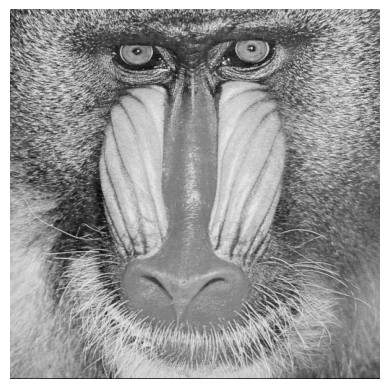

In [16]:
plt.imshow(host, cmap='gray')
plt.axis('off')
plt.show()

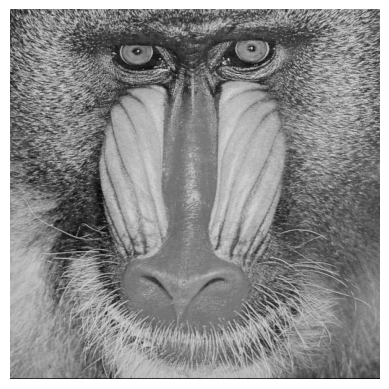

In [17]:
# Now perform the embedding process for each most complex block
for x in range(1024):
    _, B = single_block_embedding(x)
    r, c = complex_blocks[x][0]
    host_blocks[r,:,c,:] = B

new_host_image = host_blocks.reshape(512, 512)

plt.imshow(new_host_image, cmap='gray')
plt.axis('off')
plt.savefig('temp_img.png', bbox_inches='tight', pad_inches=0)

### Watermark Extraction

#### One Block Definition

In [18]:
# New numpy array to hold the values of the extracted watermark
constructed_watermark = np.zeros((32, 32))

# The complex_blocks array from earlier will give us the
# place of the blocks which we need to check
def single_block_extraction(index):
    # index is the location of the block in the complex_blocks array
    # it can be any number from 0 to 1023
    r, c = complex_blocks[index][0]
    B = host_blocks[r,:,c,:]
    U, _, _ = SVD(B)

    # i and j are the indices for getting the corresponding pixel in the watermark
    i = index // 32
    j = index % 32

    relation = abs(U[1,0]) - abs(U[2,0])

    if relation > 0:
        constructed_watermark[i,j] = 0
    else:
        constructed_watermark[i,j] = 1

#### Entire Process

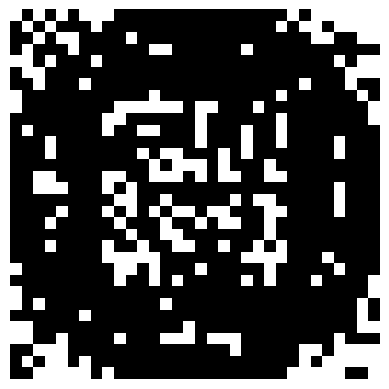

In [19]:
# Now perform the extracting process for the necessary blocks
for x in range(1024):
    single_block_extraction(x)

plt.imshow(constructed_watermark, cmap='binary')
plt.axis('off')
plt.savefig('extracted_watermark.png', dpi=32, bbox_inches='tight', pad_inches=0)
plt.show()

### Peak Signal-to-Noise Ratio

In [20]:
# Needed for calculating PSNR between the original image and the watermarked image
from skimage.metrics import peak_signal_noise_ratio
from skimage import io

# Needed for correctly resizing the watermarked image
from PIL import Image

# Resize the watermarked image so that the PSNR can be calculated
saved_image = Image.open('temp_img.png')
resized_image = saved_image.resize((512, 512))
resized_image.save('new_host_image.png')

original = io.imread('host_image.png', as_gray=True)
new = io.imread('new_host_image.png', as_gray=True)

# Calculate PSNR
psnr = peak_signal_noise_ratio(original, new, data_range=1)

print('Peak Signal-to-Noise Ratio:', -psnr)

Peak Signal-to-Noise Ratio: 43.50178868977843
